In [4]:
from multidimvis_main import *

In [5]:
organism = 'Human'

In [6]:
G = nx.read_edgelist('input/ppi_elist.txt',data=False)
# d_ent_sym, d_sym_ent = genent2sym()

d_gene_do = pickle.load( open( "input/d_gene_do.pkl", "rb" ) )
d_do_genes = pickle.load( open( "input/d_do_genes.pkl", "rb" ) )
d_do_names = pickle.load( open( "input/DO_names.pkl", "rb" ) )
d_names_do = {y:x for x,y in d_do_names.items()}

In [7]:
print('Number of nodes i.e. genes: %s' %len(list(G.nodes())))
print('Number of edges: %s' %len(list(G.edges())))
print('Network density: %.1f%%' %(200.*len(list(G.edges()))/(len(list(G.nodes()))*len(list(G.nodes()))-1)))

Number of nodes i.e. genes: 16376
Number of edges: 309355
Network density: 0.2%


## CENTRALITIES

In [8]:
# precalculated import

df_centralities = pd.read_csv('output_csv/Features_centralities_Dataframe_'+organism+'.csv', index_col=0)


# dicts 
d_deghubs = dict(zip(G.nodes(),df_centralities['degs']))
d_clos = dict(zip(G.nodes(), df_centralities['clos']))
d_betw = dict(zip(G.nodes(), df_centralities['betw']))
d_eigen = dict(zip(G.nodes(), df_centralities['eigen']))

# ffeature list
degs = list(df_centralities['degs'])
clos = list(df_centralities['clos'])
betw = list(df_centralities['betw'])
eigen = list(df_centralities['eigen'])

d_centralities = dict(zip(list(G.nodes),zip(degs,clos,betw,eigen)))
l_features = []
for i in d_centralities.items():
    k=list(i)
    l_features.append(k)
    
    
DM_centralities = pd.DataFrame(distance.squareform(distance.pdist(df_centralities, 'euclidean')))
# DM_centralities.to_csv(r'output_csv/DistanceMatrix_centralities_Dataframe_'+organism+'.csv', index = True)
# DM_centralities = pd.read_csv('output_csv/DistanceMatrix_centralities_Dataframe_'+organism+'.csv', index_col=0)

### MATRICES

### 3D t-SNE

In [11]:
# import precalculated embedded (XYZ)

df_tsne_posG3d_m = pd.read_csv('output_csv/3DPortrait_XYZ_markov_'+organism+'.csv', index_col=0)

# convert to dict with nodes: X,Y,Z
X = list(df_tsne_posG3d_m['0'])
Y = list(df_tsne_posG3d_m['1'])
Z = list(df_tsne_posG3d_m['2'])

tsne_posG3d_m = dict(zip(list(G.nodes()),zip(X,Y,Z)))

### DISEASE SELECTION 

In [77]:
def color_disease_outgoingedges_(G, l_majorcolor_nodes, color):

    d_col_edges = {}
    for e in G.edges():
        for node in l_majorcolor_nodes:
            if e[0] == node:
                d_col_edges[e]=color
            elif e[1] == node:
                d_col_edges[e]=color
           
    d_ignored_edges = {}
    for node in l_majorcolor_nodes:
        for edge in G.edges():
            if node not in edge: 
                d_ignored_edges[edge] = 'black'

    d_edges_all = {**d_col_edges, **d_ignored_edges}
    d_edges_all_sorted = {edge:d_edges_all[edge] for edge in G.edges()}
    edge_color = list(d_edges_all.values())
    
    return d_edges_all_sorted

In [91]:
disease = 'asthma'
disease_col = 'blue'
disease_genes = get_disease_genes(G, d_names_do, d_do_genes, disease)

# NODE COLOURS
colours = color_diseasecategory(G, d_names_do, d_do_genes, disease, disease_col)

# EDGE COLOURS
#edge_color = list(color_disease_outgoingedges_(G, disease_genes, disease_col).values())

In [92]:
len(disease_genes)

292

### VISUALIZATION SETTINGS

In [101]:
# Node size e.g. DEGREE
degs = G.degree()
node_factor = 0.01
size3d = draw_node_size(G, degs, node_factor) # node size based on degree


#edge_color = 'dimgrey'
edge_width = 0.1

opacity_nodes = 0.9
opacity_edges = 0.05
node_edge_col = colours

### 3D MARKOV PORTRAITS

In [94]:
prplxty3d = 50 # range: 5-50 / default = 30.#
density3d = 1.2 # default 12.
l_rate3d = 5000 # default 200.
steps3d = 1000 #min 250
metric='euclidean'

In [102]:
%%time
#size3d = 2

tsne_m_edges = get_trace_edges(G, tsne_posG3d_m, edge_color) 
tsne_m_nodes = get_trace_nodes(G, tsne_posG3d_m, l_features, colours, size3d)

#tsne_data_m = [tsne_m_edges, tsne_m_nodes]
tsne_data_m = [tsne_m_nodes]

CPU times: user 16.3 s, sys: 54.3 ms, total: 16.3 s
Wall time: 16.3 s


Perplexity: 50
Early Exaggeration: 1.2
Learning rate: 5000
Iterations: 1000


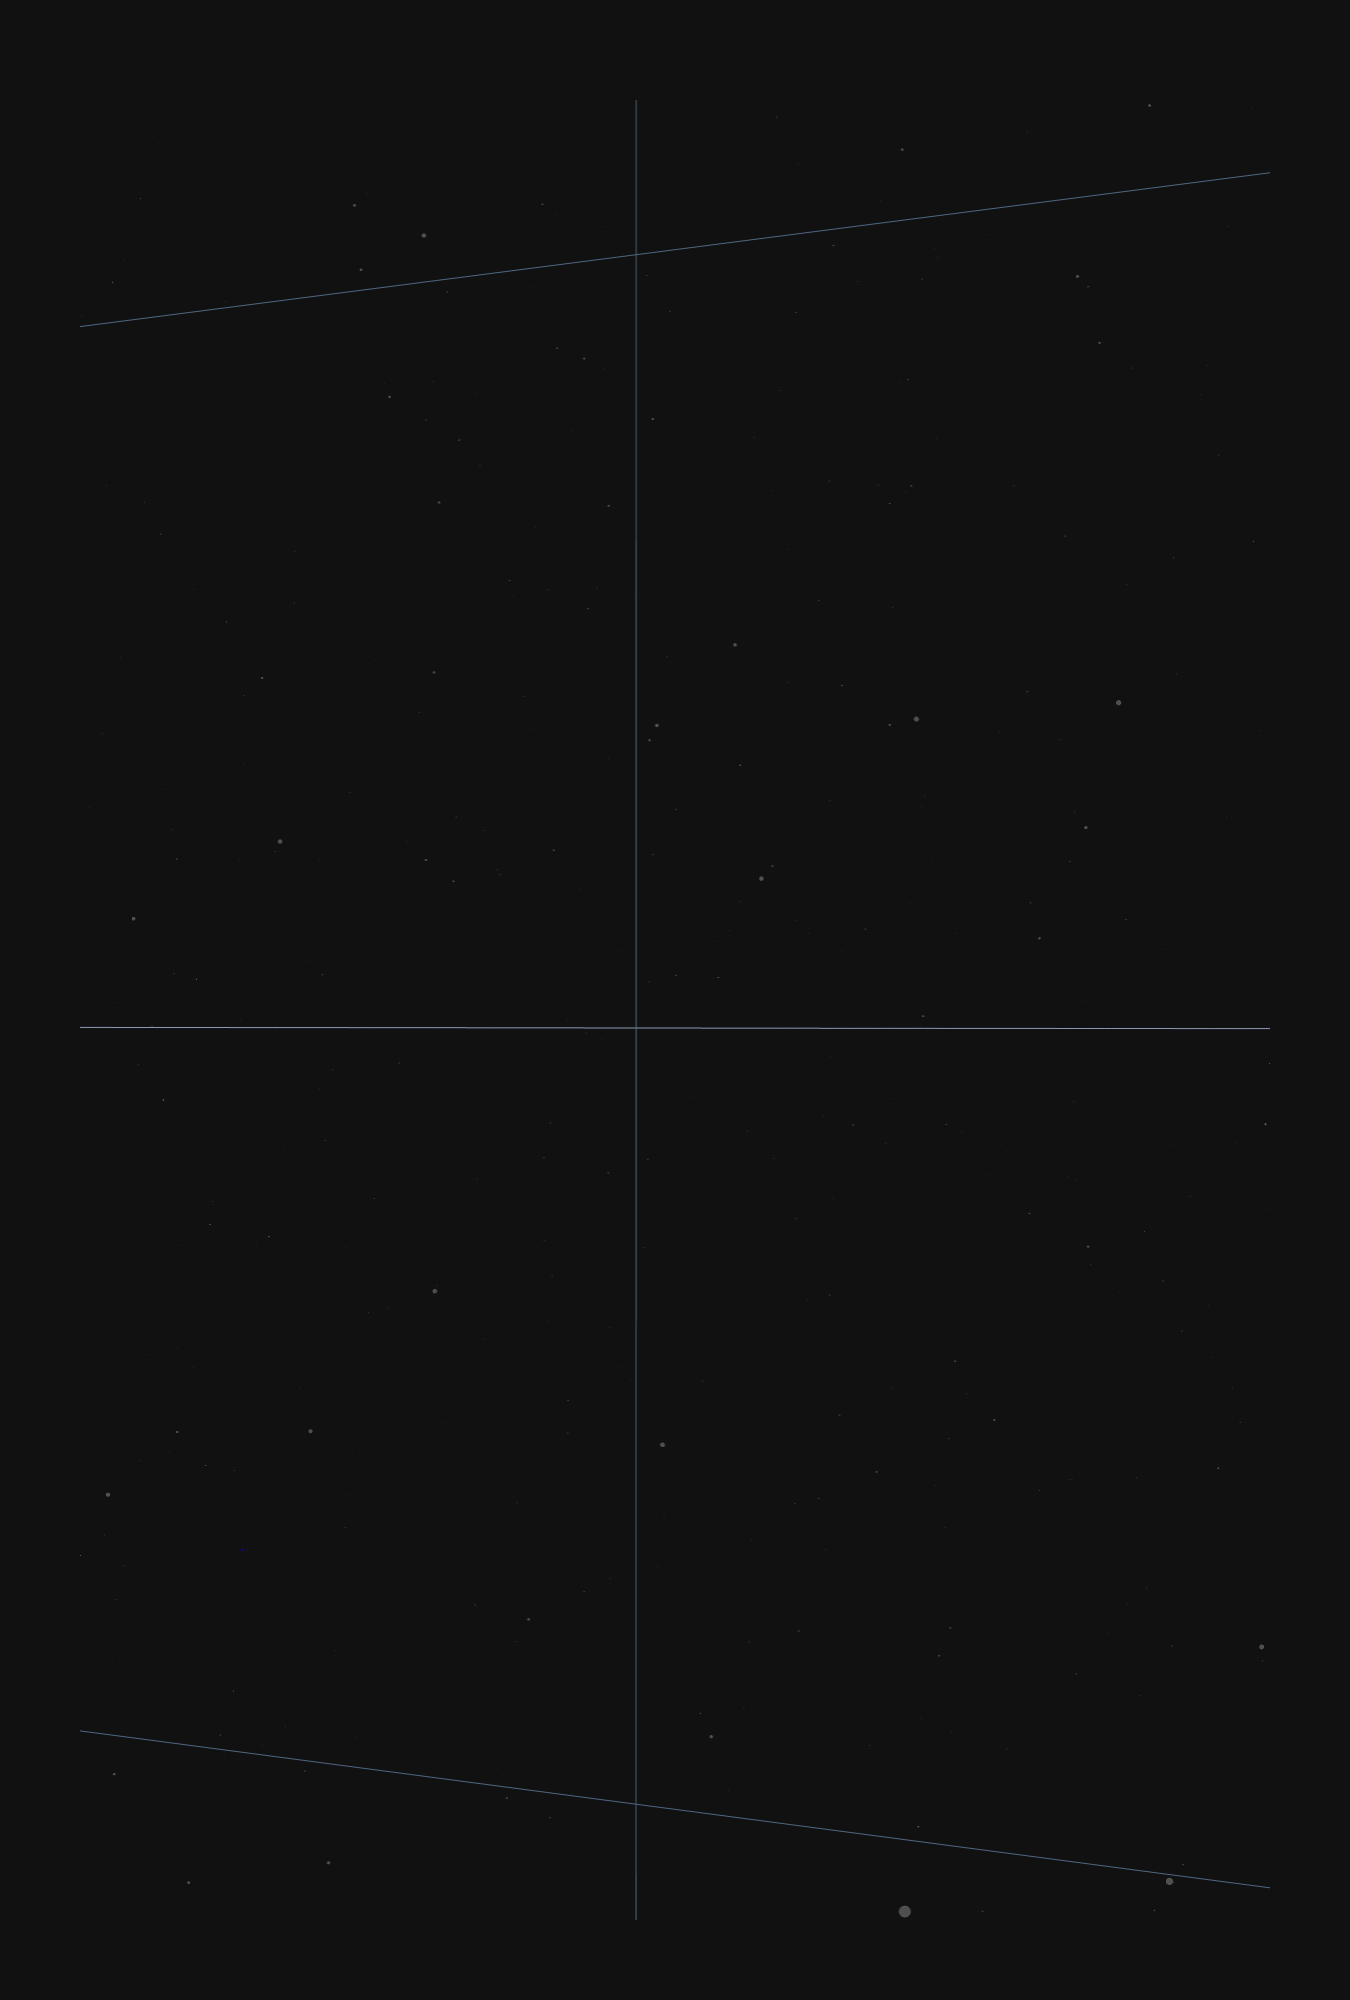

'output_plots/3Dportrait_tsne_RWR_euclidean_asthma_Human.html'

In [103]:
print('Perplexity:', prplxty3d)
print('Early Exaggeration:', density3d)
print('Learning rate:', l_rate3d)
print('Iterations:', steps3d)


fig = pgo.Figure()
for i in tsne_data_m:
    fig.add_trace(i)
fig.update_layout(template='plotly_dark', showlegend=False, width=2000, height=2000)
py.iplot(fig)

plotly.offline.plot(fig, filename = 'output_plots/3Dportrait_tsne_RWR_'+metric+'_'+disease+'_'+organism+'.html', auto_open=False)